In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
# import squidpy as sq
import numpy as np
import cell2location

Global seed set to 0


In [2]:
import scanpy.external as sce
import scvi
# from scvi.model import CondSCVI, DestVI
# from scvi.external import RNAStereoscope, SpatialStereoscope

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.1.1
absl                        NA
anyio                       NA
attr                        21.2.0
babel                       2.9.1
backcall                    0.2.0
botocore                    1.23.24
cell2location               NA
certifi                     2022.06.15
cffi                        1.15.0
charset_normalizer          2.0.7
chex                        0.1.3
colorama                    0.4.5
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.0
decorator                   5.1.1
defusedxml                  0.7.1
deprecate                   0.3.1
docrep                      0.3.2
entrypoints                 0.3
etils                       0.6.0
fastjsonschema              NA
flatbuffers                 2.0
flax                        0.5.2
fsspec                      2022.5.0
google                      NA
h5py     

In [ ]:
# t1l_day7_slideseq = sc.read_h5ad("./../t1l_day7_slideseq_mm_with_image_filtered_processed.h5ad", )

In [7]:
heart_infection_sc_no_viral_genes = sc.read_h5ad('./../pyobjs_github/heart_infection_sc_raw_counts.h5ad')
# heart_infection_sc_no_viral_genes.layers["counts"] = heart_infection_sc_no_viral_genes.X.copy()
heart_infection_sc_no_viral_genes.obs = sc.read_h5ad("./../pyobjs_github/heart_infection_sc.h5ad").obs
heart_infection_sc_no_viral_genes

AnnData object with n_obs × n_vars = 31684 × 22757
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'celltype_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'condition_colors'

In [8]:
heart_infection_sc_no_viral_genes = heart_infection_sc_no_viral_genes[heart_infection_sc_no_viral_genes.obs["celltypes_leiden_0.5"] != ""]
heart_infection_sc_no_viral_genes

View of AnnData object with n_obs × n_vars = 31584 × 22757
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'celltype_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'condition_colors'

In [9]:
heart_infection_sc_no_viral_genes.obs["celltypes_leiden_0.5"].value_counts()

Fibroblasts                                8920
Endothelial cells                          6145
Inflamed endothelial cells                 2712
T cells                                    2460
Dendritic cells                            1807
Mesenchymal endothelial cells              1495
Macrophages                                1393
Endocardial cells                          1041
Cxcl9-high inflamed\n endothelial cells     984
Smooth muscle cells                         720
Pericytes                                   714
Cardiomyocytes                              559
B cells                                     534
Ccl2+ fibroblasts                           522
Erythroblasts                               463
Pericardial cells                           398
NK cells                                    295
Schwann cells                               215
Neutrophils                                 207
Name: celltypes_leiden_0.5, dtype: int64

/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/cell2location/utils/filtering.py:26: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_cells"] = np.array((adata.X > 0).sum(0)).flatten()
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


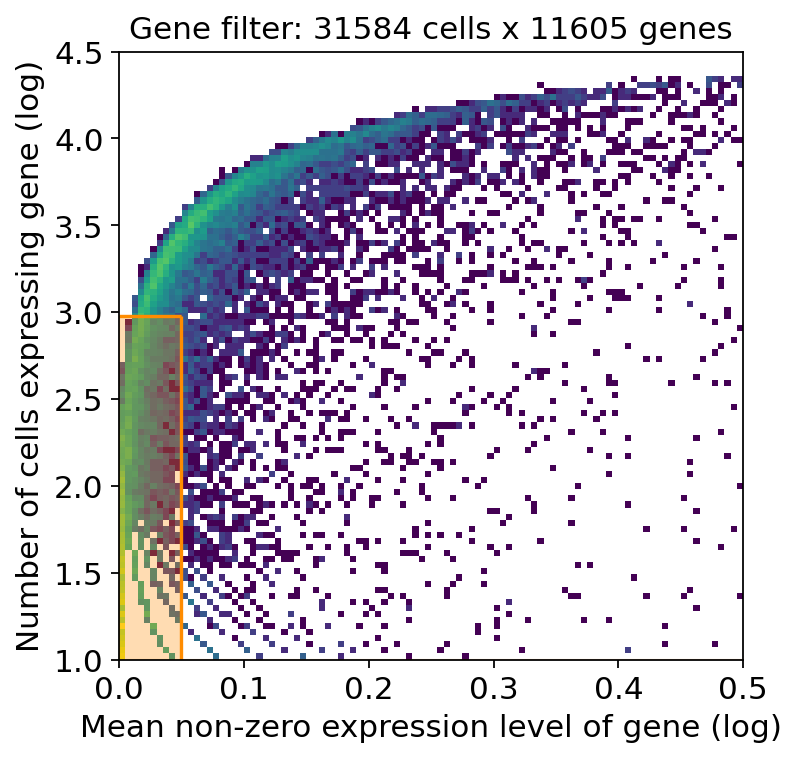

In [10]:
from cell2location.utils.filtering import filter_genes
selected = filter_genes(heart_infection_sc_no_viral_genes, cell_count_cutoff=5, cell_percentage_cutoff2=0.03, nonz_mean_cutoff=1.12)

# filter the object
adata_ref = heart_infection_sc_no_viral_genes[:, selected].copy()

In [11]:
adata_ref.obs.columns

Index(['sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1',
       'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts',
       'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt',
       'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes',
       'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.5',
       'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3',
       'celltypes_leiden_0.5', 'celltype_groups'],
      dtype='object')

In [12]:
# prepare anndata for the regression model
cell2location.models.RegressionModel.setup_anndata(adata=adata_ref,
                        # 10X reaction / sample / batch
                        batch_key='sample',
                        # cell type, covariate used for constructing signatures
                        labels_key='celltypes_leiden_0.5')

Unable to initialize backend 'tpu_driver': NOT_FOUND: Unable to find driver in registry given worker: 
Unable to initialize backend 'cuda': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'rocm': module 'jaxlib.xla_extension' has no attribute 'GpuAllocatorConfig'
Unable to initialize backend 'tpu': INVALID_ARGUMENT: TpuPlatform is not available.


In [13]:
from cell2location.models import RegressionModel
mod = RegressionModel(adata_ref)

# view anndata_setup as a sanity check
mod.view_anndata_setup()

Anndata setup with scvi-tools version 0.16.4.

Setup via `RegressionModel.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': 'sample',
│   'labels_key': 'celltypes_leiden_0.5',
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_cells          │ 31584 │
│          n_vars          │ 11605 │
│         n_batch          │   6   │
│         n_labels         │  19   │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
│    ind_x     │   adata.obs['_indices']   │
└──────────────┴───────────────────────────┘

                       batch State Registry                       
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃   Source Location   ┃     Categories     ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['sample'] │  Heart_Mock_D4PI   │          0          │
│                     │ Heart_T1L-WT_D4PI  │          1          │
│                     │  Heart_Mock_D7PI   │          2          │
│                     │ Heart_T1L-WT_D7PI  │          3          │
│                     │  Heart_Mock_D10PI  │          4          │
│                     │ Heart_T1L-WT_D10PI │          5          │
└─────────────────────┴────────────────────┴─────────────────────┘

                                   labels State Registry                                   
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃          Source Location          ┃          Categories           ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['celltypes_leiden_0.5'] │            B cells            │          0          │
│                                   │        Cardiomyocytes         │          1          │
│                                   │       Ccl2+ fibroblasts       │          2          │
│                                   │      Cxcl9-high inflamed      │          3          │
│                                   │       endothelial cells       │                     │
│                                   │        Dendritic cells        │          4          │
│                                   │       Endocardial cells       │          5          │
│                                   │       Endothelial cells       │          6          │
│                                   │         Erythroblasts         │          7          │
│                                   │          Fibroblasts          │          8          │
│                                   │  Inflamed endothelial cells   │          9          │
│                                   │          Macrophages          │         10          │
│                                   │ Mesenchymal endothelial cells │         11          │
│                                   │           NK cells            │         12          │
│                                   │          Neutrophils          │         13          │
│                                   │       Pericardial cells       │         14          │
│                                   │           Pericytes           │         15          │
│                                   │         Schwann cells         │         16          │
│                                   │      Smooth muscle cells      │         17          │
│                                   │            T cells            │         18          │
└───────────────────────────────────┴───────────────────────────────┴─────────────────────┘

In [14]:
mod.train(max_epochs=250, use_gpu=3)

Created a temporary directory at /tmp/tmpeg7z2xpl
Writing /tmp/tmpeg7z2xpl/_remote_module_non_scriptable.py
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 250/250: 100%|██████████| 250/250 [13:11<00:00,  3.17s/it, v_num=1, elbo_train=1.61e+8]


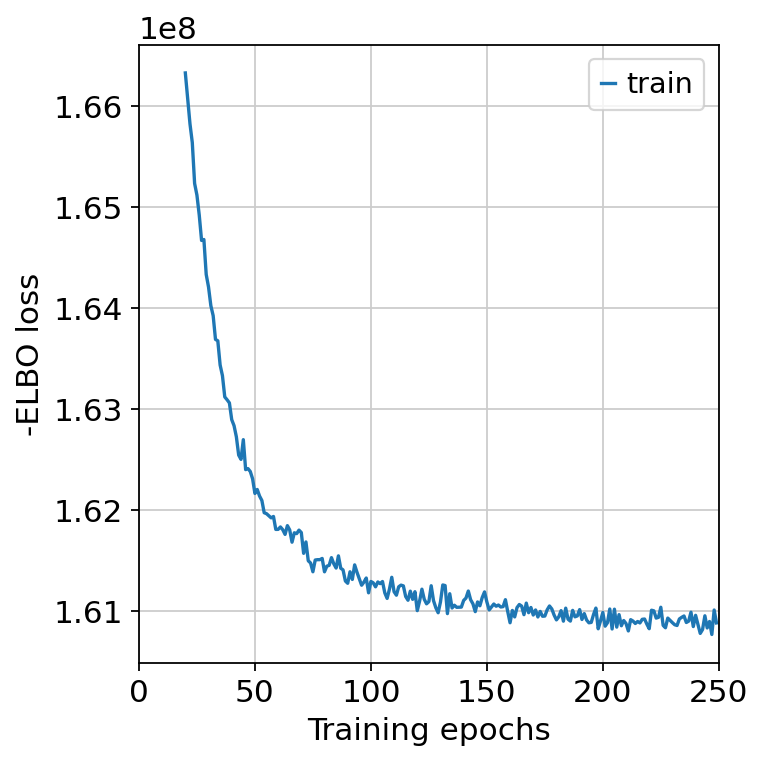

In [16]:
mod.plot_history(20)

In [17]:
# In this section, we export the estimated cell abundance (summary of the posterior distribution).
adata_ref = mod.export_posterior(
    adata_ref, sample_kwargs={'num_samples': 1000, 'batch_size': 2500, 'use_gpu': True}
)

# Save model
mod.save(f"sc_cell2location_ref_ss", overwrite=True)

# Save anndata object with results
adata_file = f"heart_infection_sc_no_viral_genes_cell2location_ss.h5ad"
adata_ref.write(adata_file)
adata_file

Sampling global variables, sample: 100%|██████████| 999/999 [00:09<00:00, 102.65it/s]


'heart_infection_sc_no_viral_genes_cell2location_ss.h5ad'

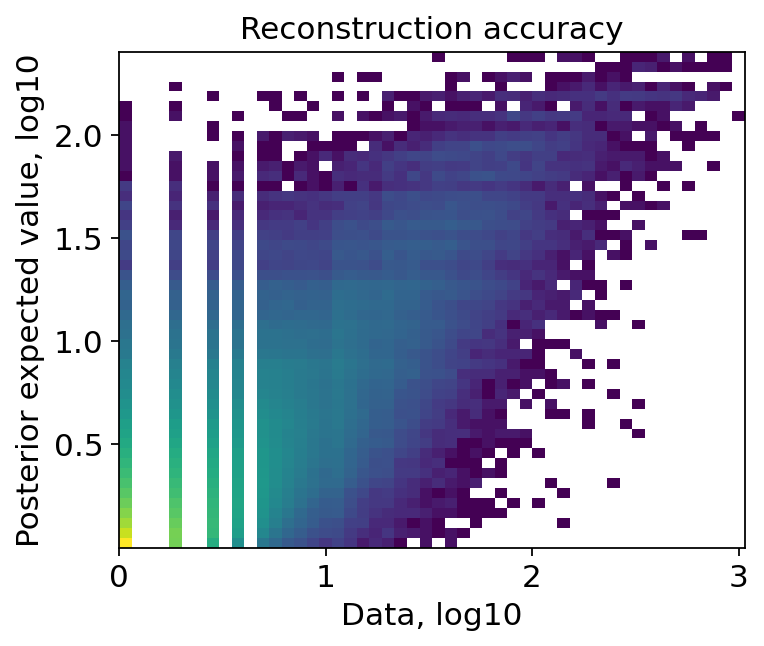

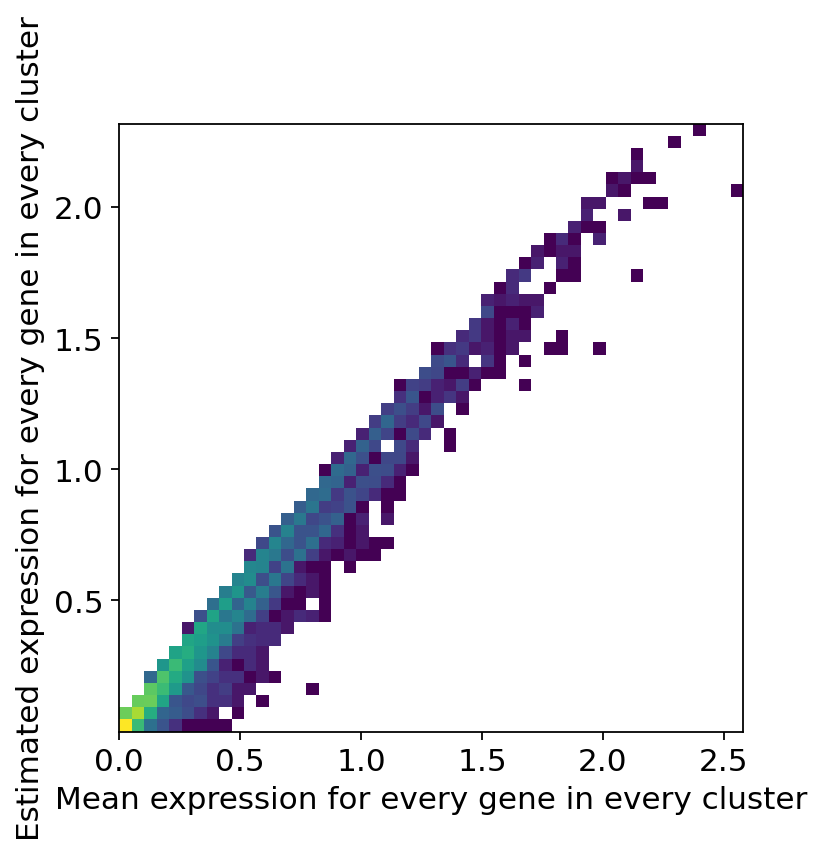

In [18]:
mod.plot_QC()

In [2]:
adata_file = f"./../../../notebooks/heart_infection_sc_no_viral_genes_cell2location_ss.h5ad"
adata_ref = sc.read_h5ad(adata_file)
mod = cell2location.models.RegressionModel.load(f"./../../../notebooks/sc_cell2location_ref_ss", adata_ref)

INFO     File ./../../../notebooks/sc_cell2location_ref_ss/model.pt already downloaded       
INFO     Preparing underlying module for load                                                


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Epoch 1/633:   0%|          | 1/633 [00:00<04:41,  2.25it/s, v_num=1, elbo_train=1.75e+8]


In [3]:
# export estimated expression in each cluster
if 'means_per_cluster_mu_fg' in adata_ref.varm.keys():
    inf_aver = adata_ref.varm['means_per_cluster_mu_fg'][[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
else:
    inf_aver = adata_ref.var[[f'means_per_cluster_mu_fg_{i}'
                                    for i in adata_ref.uns['mod']['factor_names']]].copy()
inf_aver.columns = adata_ref.uns['mod']['factor_names']
print(inf_aver.shape)
inf_aver.iloc[0:5, 0:5]

(11605, 19)


B cells  Cardiomyocytes  Ccl2+ fibroblasts  \
Rp1     0.002075        0.050569           0.001716   
Sox17   0.007470        0.035852           0.004117   
Mrpl15  0.240195        0.515905           0.330243   
Lypla1  0.046616        0.130619           0.106822   
Tcea1   0.104507        0.084514           0.182634   

        Cxcl9-high inflamed\n endothelial cells  Dendritic cells  
Rp1                                    0.000918         0.001103  
Sox17                                  0.737784         0.010690  
Mrpl15                                 0.394778         0.189771  
Lypla1                                 0.194293         0.061742  
Tcea1                                  0.201065         0.097986

In [21]:
adata_vis = sc.read_h5ad("./../../../pyobjs_github//t1l_day7_slideseq_mm_with_image_filtered.h5ad")
adata_vis

AnnData object with n_obs × n_vars = 40400 × 14145
    obs: 'n_counts', 'barcode', 'x', 'y', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_counts'
    obsm: 'spatial'

In [22]:
# find shared genes and subset both anndata and reference signatures
intersect = np.intersect1d(adata_vis.var_names, inf_aver.index)
print(len(intersect))
adata_vis = adata_vis[:, intersect].copy()
inf_aver = inf_aver.loc[intersect, :].copy()

# prepare anndata for cell2location model
cell2location.models.Cell2location.setup_anndata(adata=adata_vis)

10571


In [23]:
# create and train the model
mod = cell2location.models.Cell2location(
    adata_vis, cell_state_df=inf_aver,
    # the expected average cell abundance: tissue-dependent
    # hyper-prior which can be estimated from paired histology:
    N_cells_per_location=1,
    # hyperparameter controlling normalisation of
    # within-experiment variation in RNA detection:
    detection_alpha=20
)
mod.view_anndata_setup()

Anndata setup with scvi-tools version 0.16.4.

Setup via `Cell2location.setup_anndata` with arguments:

{
│   'layer': None,
│   'batch_key': None,
│   'labels_key': None,
│   'categorical_covariate_keys': None,
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_cells          │ 40400 │
│          n_vars          │ 10571 │
│         n_batch          │   1   │
│         n_labels         │   1   │
│ n_extra_categorical_covs │   0   │
│ n_extra_continuous_covs  │   0   │
└──────────────────────────┴───────┘

               Data Registry                
┏━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Registry Key ┃    scvi-tools Location    ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      X       │          adata.X          │
│    batch     │ adata.obs['_scvi_batch']  │
│    labels    │ adata.obs['_scvi_labels'] │
│    ind_x     │   adata.obs['_indices']   │
└──────────────┴───────────────────────────┘

                     batch State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_batch'] │     0      │          0          │
└──────────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

In [7]:
import torch
torch.cuda.empty_cache()

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/pytorch_lightning/trainer/configuration_validator.py:120: UserWarning: You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.
  rank_zero_warn("You passed in a `val_dataloader` but have no `validation_step`. Skipping val loop.")
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:432: UserWarning: The number of training samples (5) is smaller than the logging interval Trainer(log_every_n_steps=10). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 10000/10000: 100%|██████████| 10000/10000 [9:19:51<00:00,  3.36s/it, v_num=1, elbo_train=3.33e+7] 


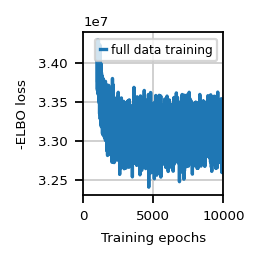

In [24]:
mod.train(max_epochs=10000,
          # train using full data (batch_size=None)
          batch_size=10000,
          # use all data points in training because
          # we need to estimate cell abundance at all locations
          train_size= 1.0)

# plot ELBO loss history during training, removing first 100 epochs from the plot
mod.plot_history(1000)
plt.legend(labels=['full data training']);

In [25]:
# In this section, we export the estimated cell abundance (summary of the posterior distribution).
adata_vis = mod.export_posterior(
    adata_vis, sample_kwargs={'num_samples': 1000, 'batch_size': 2500, 'use_gpu': True}
)

# Save model
mod.save(f"./../../../pyobjs_github/sp_cell2location_slideseq", overwrite=True)

# Save anndata object with results
adata_file = f"./../../../pyobjs_github/t1l_day7_slideseq_cell2location.h5ad"
adata_vis.write(adata_file)
adata_file

Sampling global variables, sample: 100%|██████████| 999/999 [00:13<00:00, 71.92it/s]


'./../../../pyobjs_github/t1l_day7_slideseq_cell2location.h5ad'

In [32]:
adata_file = f"./../../../notebooks/t1l_day7_slideseq_cell2location.h5ad"
adata_vis = sc.read_h5ad(adata_file)
adata_vis

AnnData object with n_obs × n_vars = 40400 × 10571
    obs: 'n_counts', 'barcode', 'x', 'y', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', '_indices', '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_counts'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'mod'
    obsm: 'means_cell_abundance_w_sf', 'q05_cell_abundance_w_sf', 'q95_cell_abundance_w_sf', 'spatial', 'stds_cell_abundance_w_sf'

In [ ]:
## Visualising cell abundance in spatial coordinates

In [26]:
print(adata_vis.obsm)
adata_vis.obsm['q05_cell_proportions'] = adata_vis.obsm['q05_cell_abundance_w_sf'].div(adata_vis.obsm['q05_cell_abundance_w_sf'].sum(axis=1), axis=0)

AxisArrays with keys: spatial, means_cell_abundance_w_sf, stds_cell_abundance_w_sf, q05_cell_abundance_w_sf, q95_cell_abundance_w_sf


In [7]:
adata_vis.obsm['q05_cell_proportions']

q05cell_abundance_w_sf_B cells  \
GGACGGGATTCTCT                        0.039762   
ACGGCAACACCGAA                        0.020687   
GTGGAAACTTTTGA                        0.074389   
GCGTGTTTCTCTGT                        0.013291   
TAGCGTTGAGAATG                        0.031040   
...                                        ...   
CATTATTATGTGTC                        0.022864   
TTGGTCGCAGTCTG                        0.029063   
AGGGCAATTGTACT                        0.019596   
TCTTGACCATATAC                        0.037551   
CGCAGAATTTAGAG                        0.013890   

                q05cell_abundance_w_sf_Cardiomyocytes  \
GGACGGGATTCTCT                               0.389836   
ACGGCAACACCGAA                               0.531609   
GTGGAAACTTTTGA                               0.305066   
GCGTGTTTCTCTGT                               0.414265   
TAGCGTTGAGAATG                               0.684693   
...                                               ...   
CATTATTATGTGTC                               0.534446   
TTGGTCGCAGTCTG                               0.468987   
AGGGCAATTGTACT                               0.420494   
TCTTGACCATATAC                               0.481047   
CGCAGAATTTAGAG                               0.430114   

                q05cell_abundance_w_sf_Ccl2+ fibroblasts  \
GGACGGGATTCTCT                                  0.035786   
ACGGCAACACCGAA                                  0.001453   
GTGGAAACTTTTGA                                  0.048261   
GCGTGTTTCTCTGT                                  0.009236   
TAGCGTTGAGAATG                                  0.012920   
...                                                  ...   
CATTATTATGTGTC                                  0.033149   
TTGGTCGCAGTCTG                                  0.024485   
AGGGCAATTGTACT                                  0.006328   
TCTTGACCATATAC                                  0.011348   
CGCAGAATTTAGAG                                  0.313895   

                q05cell_abundance_w_sf_Cxcl9-high inflamed\n endothelial cells  \
GGACGGGATTCTCT                                           0.024034                
ACGGCAACACCGAA                                           0.002307                
GTGGAAACTTTTGA                                           0.022113                
GCGTGTTTCTCTGT                                           0.018768                
TAGCGTTGAGAATG                                           0.024268                
...                                                           ...                
CATTATTATGTGTC                                           0.066927                
TTGGTCGCAGTCTG                                           0.046964                
AGGGCAATTGTACT                                           0.173632                
TCTTGACCATATAC                                           0.065133                
CGCAGAATTTAGAG                                           0.006056                

                q05cell_abundance_w_sf_Dendritic cells  \
GGACGGGATTCTCT                                0.105335   
ACGGCAACACCGAA                                0.005978   
GTGGAAACTTTTGA                                0.045761   
GCGTGTTTCTCTGT                                0.290149   
TAGCGTTGAGAATG                                0.009595   
...                                                ...   
CATTATTATGTGTC                                0.015881   
TTGGTCGCAGTCTG                                0.022284   
AGGGCAATTGTACT                                0.068491   
TCTTGACCATATAC                                0.016672   
CGCAGAATTTAGAG                                0.011367   

                q05cell_abundance_w_sf_Endocardial cells  \
GGACGGGATTCTCT                                  0.011379   
ACGGCAACACCGAA                                  0.003315   
GTGGAAACTTTTGA                                  0.255389   
GCGTGTTTCTCTGT                                  0.023793   
TAGCGTTGAGAATG             

In [28]:
# add 5% quantile, representing confident cell abundance, 'at least this amount is present',
# to adata.obs with nice names for plotting
adata_vis.obs["total_abundance"] = adata_vis.obsm['q05_cell_abundance_w_sf'].sum(axis = 1)
adata_vis.obs[adata_vis.uns['mod']['factor_names']] = adata_vis.obsm['q05_cell_proportions']
ct_list = list(adata_vis.uns['mod']['factor_names'])
adata_vis.obs["max_pred"] = adata_vis.obs[adata_vis.uns['mod']['factor_names']].max(axis=1)
adata_vis.obs["max_pred_celltype"] = adata_vis.obs[adata_vis.uns['mod']['factor_names']].idxmax(axis=1)

In [10]:
adata_vis.obs[adata_vis.uns['mod']['factor_names']].to_csv("./../csvs_github/heart_spatial_RNAseq_cell2loc_proportions.csv")

In [6]:
adata_vis.obs["max_pred_celltype"].value_counts()

Cardiomyocytes                             34058
T cells                                     1444
Dendritic cells                             1086
Erythroblasts                                844
Ccl2+ fibroblasts                            670
NK cells                                     418
Macrophages                                  408
Cxcl9-high inflamed\n endothelial cells      368
Neutrophils                                  366
Fibroblasts                                  253
Endocardial cells                            132
Smooth muscle cells                          100
Mesenchymal endothelial cells                 89
Pericardial cells                             56
B cells                                       45
Schwann cells                                 25
Inflamed endothelial cells                    24
Pericytes                                      8
Endothelial cells                              6
Name: max_pred_celltype, dtype: int64

In [16]:
adata_vis.obs["max_pred_celltype"].value_counts()[adata_vis.obs["max_pred_celltype"].value_counts() >= 100].index.tolist()

['Cardiomyocytes',
 'T cells',
 'Dendritic cells',
 'Erythroblasts',
 'Ccl2+ fibroblasts',
 'NK cells',
 'Macrophages',
 'Neutrophils',
 'Cxcl9-high inflamed\n endothelial cells',
 'Fibroblasts']

In [8]:
sc_clusters = ['Cardiomyocytes',
 'T cells',
 'Dendritic cells',
 'Erythroblasts',
 'Ccl2+ fibroblasts',
 'NK cells',
 'Macrophages',
 'Cxcl9-high inflamed\n endothelial cells',
 'Neutrophils',
 'Fibroblasts',
 'Endocardial cells']

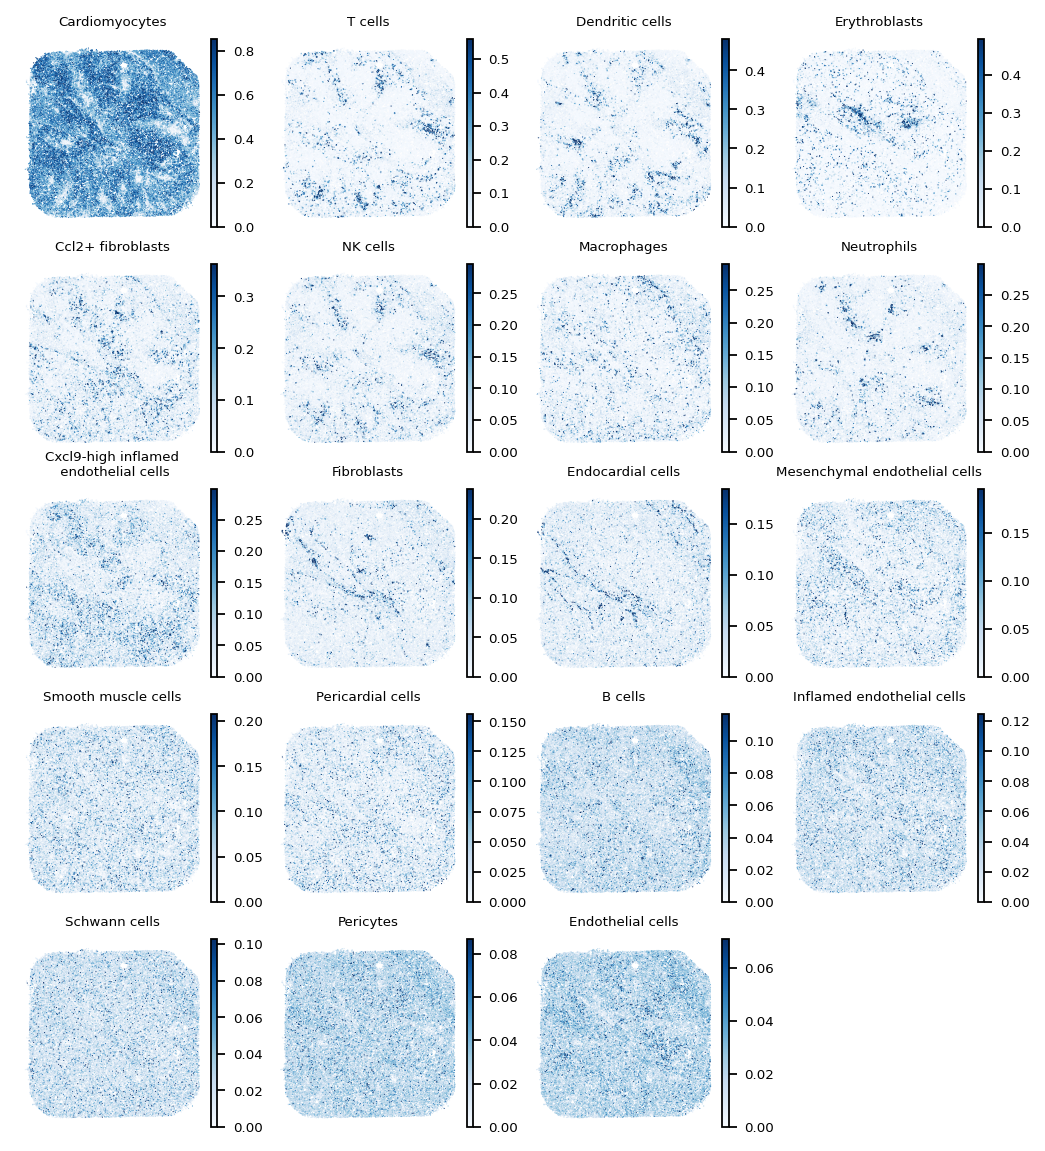

In [30]:
# plot in spatial coordinates
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(1.6, 1.6), facecolor='white', frameon=False, transparent=True, vector_friendly = True, format="pdf")
sc.pl.spatial(adata_vis, cmap="Blues",
                  # show first 8 cell types
                  color=list(adata_vis.obs["max_pred_celltype"].value_counts().index), spot_size= 30, 
              ncols=4, wspace = 0.2, hspace=0.2,
                  # limit color scale at 99.2% quantile of cell abundance
                 vmin=0, vmax='p99.2', legend_fontsize=5)

In [9]:
sc_cluster_order = ["Endocardial cells",
                                "Pericardial cells",
                                "Schwann cells",
                                "Ccl2+ fibroblasts",
                                "Fibroblasts", 
                                "Neutrophils",
                                "Dendritic cells",
                                "Macrophages",
                                "B cells",
                                "NK cells",
                                "T cells",
                                "Cxcl9-high inflamed\n endothelial cells",
                                "Endothelial cells",
                                "Inflamed endothelial cells",
                                "Smooth muscle cells",
                                "Mesenchymal endothelial cells",
                                "Pericytes", 
                                "Cardiomyocytes",
                                "Erythroblasts"]
adata_vis.obs["max_pred_celltype"] = adata_vis.obs["max_pred_celltype"].astype("category")
adata_vis.obs["max_pred_celltype"].cat.reorder_categories(
    new_categories= sc_cluster_order, inplace = True)

/tmp/ipykernel_139731/2275131871.py:21: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_vis.obs["max_pred_celltype"].cat.reorder_categories(


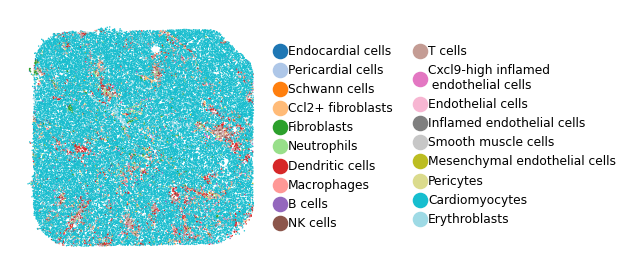

In [10]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(adata_vis, color=["max_pred_celltype"], spot_size=30, wspace=0.5, title="", palette="tab20", save="celltype_preds_slideseq_spatial.pdf")

In [16]:
# adata_vis.write_h5ad("t1l_day7_slideseq_cell2location_processed.h5ad")

In [39]:
from cell2location import run_colocation
res_dict, adata_vis = run_colocation(
    adata_vis,
    model_name='CoLocatedGroupsSklearnNMF',
    train_args={
      'n_fact': np.arange(10, 15), # IMPORTANT: use a wider range of the number of factors (5-30)
      'n_restarts': 3 # number of training restarts
    },
    export_args={'path': f'cell2loc_NMF_slideseq/CoLocatedComb/'}
)

### Analysis name: CoLocatedGroupsSklearnNMF_10combinations_40400locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 24 x 5.7 in image.
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: cell2loc_NMF_slideseq/CoLocatedComb/C

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 [Errno 2] No such file or directory: 'cell2loc_NMF_slideseq/CoLocatedComb/CoLocatedGroupsSklearnNMF_40400locations_19factors/spatial/cell_density_mean_n_fact10_ssample.pdf'
### Analysis name: CoLocatedGroupsSklearnNMF_11combinations_40400locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 24 x 5.7 in image.
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: cell2loc_NMF_slideseq/CoLocatedComb/CoLocatedGroupsSklearnNMF_40400locations_19factors/s

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 [Errno 2] No such file or directory: 'cell2loc_NMF_slideseq/CoLocatedComb/CoLocatedGroupsSklearnNMF_40400locations_19factors/spatial/cell_density_mean_n_fact11_ssample.pdf'
### Analysis name: CoLocatedGroupsSklearnNMF_12combinations_40400locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 24 x 5.7 in image.
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: cell2loc_NMF_slideseq/CoLocatedComb/CoLocatedGroupsSklearnNMF_40400locations_19factors/s

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 [Errno 2] No such file or directory: 'cell2loc_NMF_slideseq/CoLocatedComb/CoLocatedGroupsSklearnNMF_40400locations_19factors/spatial/cell_density_mean_n_fact12_ssample.pdf'
### Analysis name: CoLocatedGroupsSklearnNMF_13combinations_40400locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 24 x 5.7 in image.
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: cell2loc_NMF_slideseq/CoLocatedComb/CoLocatedGroupsSklearnNMF_40400locations_19factors/s

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 [Errno 2] No such file or directory: 'cell2loc_NMF_slideseq/CoLocatedComb/CoLocatedGroupsSklearnNMF_40400locations_19factors/spatial/cell_density_mean_n_fact13_ssample.pdf'
### Analysis name: CoLocatedGroupsSklearnNMF_14combinations_40400locations_19factors


/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1477: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 24 x 5.7 in image.
/home/mm2937/miniconda3/envs/python397/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: cell2loc_NMF_slideseq/CoLocatedComb/CoLocatedGroupsSklearnNMF_40400locations_19factors/s

Some error in plotting with scanpy or `cell2location.plt.plot_factor_spatial()`
 [Errno 2] No such file or directory: 'cell2loc_NMF_slideseq/CoLocatedComb/CoLocatedGroupsSklearnNMF_40400locations_19factors/spatial/cell_density_mean_n_fact14_ssample.pdf'


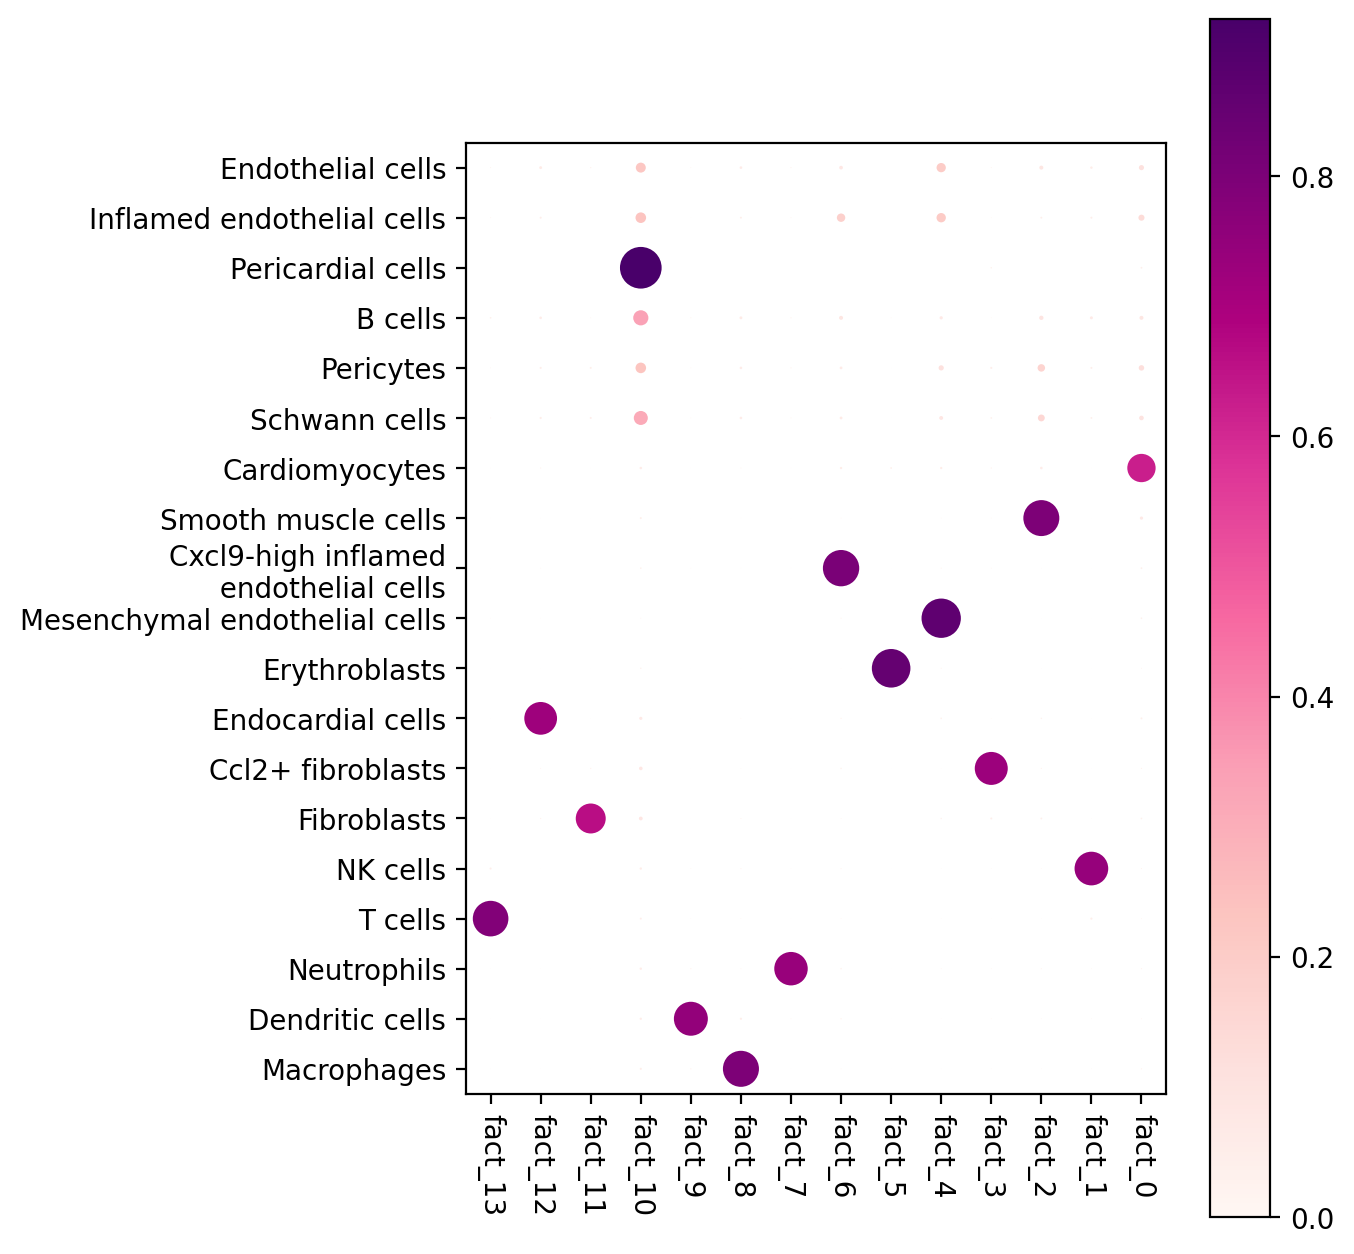

In [44]:
res_dict['n_fact14']['mod'].plot_cell_type_loadings()

In [17]:
# Compute expected expression per cell type
expected_dict = mod.module.model.compute_expected_per_cell_type(
    mod.samples["post_sample_q05"], mod.adata_manager
)

# Add to anndata layers
for i, n in enumerate(mod.factor_names_):
    adata_vis.layers[n] = expected_dict['mu'][i]

NameError: name 'mod' is not defined

In [46]:
# Save anndata object with results
adata_file = f"slideseq_cell2loc_RCTD.h5ad"
adata_vis.write(adata_file)
adata_file

'slideseq_cell2loc_RCTD.h5ad'

In [125]:
adata_vis = sc.read_h5ad("slideseq_cell2loc_RCTD.h5ad")
adata_vis

AnnData object with n_obs × n_vars = 40400 × 10571
    obs: 'n_counts', 'barcode', 'x', 'y', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', '_indices', '_scvi_batch', '_scvi_labels', 'total_abundance', 'B cells', 'Cardiomyocytes', 'Ccl2+ fibroblasts', 'Cxcl9-high inflamed\n endothelial cells', 'Dendritic cells', 'Endocardial cells', 'Endothelial cells', 'Erythroblasts', 'Fibroblasts', 'Inflamed endothelial cells', 'Macrophages', 'Mesenchymal endothelial cells', 'NK cells', 'Neutrophils', 'Pericardial cells', 'Pericytes', 'Schwann cells', 'Smooth muscle cells', 'T cells', 'max_pred', 'max_pred_celltype', 'celltypes_leiden_1.0', 'sample', 'mean_nUMI_factorsfact_0', 'mean_nUMI_factorsfact_1', 'mean_nUMI_factorsfact_2', 'mean_nUMI_factorsfact_3', 'mean_nUMI_factorsfact_4', 'mean_nUMI_factorsfact_5', 'mean_nUMI_factorsf

In [32]:
adata_vis.uns['mod']['factor_names']

array(['B cells', 'Cardiomyocytes', 'Ccl2+ fibroblasts',
       'Cxcl9-high inflamed\n endothelial cells', 'Dendritic cells',
       'Endocardial cells', 'Endothelial cells', 'Erythroblasts',
       'Fibroblasts', 'Inflamed endothelial cells', 'Macrophages',
       'Mesenchymal endothelial cells', 'NK cells', 'Neutrophils',
       'Pericardial cells', 'Pericytes', 'Schwann cells',
       'Smooth muscle cells', 'T cells'], dtype=object)

In [33]:
adata_vis.X = adata_vis.layers["Cardiomyocytes"]

In [36]:
adata_vis.obs["celltypes_leiden_1.0"] = sc.read_h5ad("./../t1l_day7_slideseq_mm_with_image_filtered_processed.h5ad").obs["celltypes_leiden_1.0"]

In [38]:
sc.tl.rank_genes_groups(adata_vis, 'celltypes_leiden_1.0', method='wilcoxon', groups=["Border-zone cardiomyocytes"], reference="Cardiomyocytes-1", key_added='rank_genes_groups_border_cm')

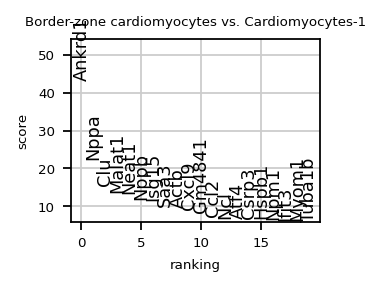

In [48]:
sc.settings.set_figure_params(dpi_save= 300, fontsize=6, figsize=(2.0,1.5), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.rank_genes_groups(adata_vis, key="rank_genes_groups_border_cm", save="Dge_results_cms" )

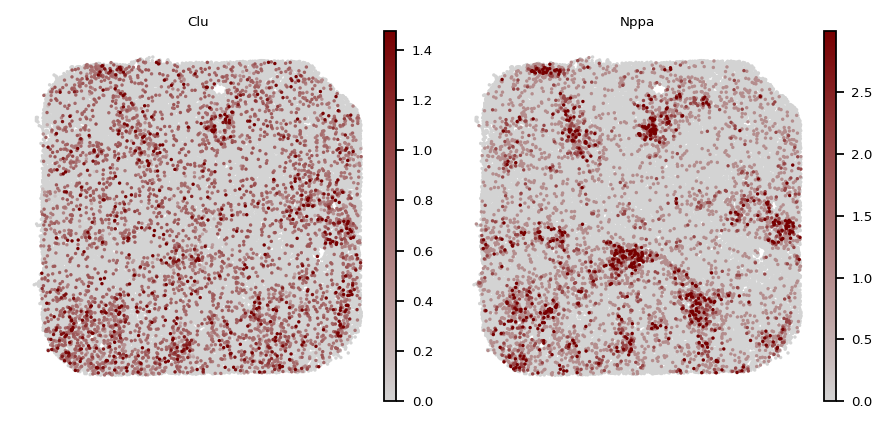

In [40]:
sc.settings.set_figure_params(dpi_save= 300, fontsize=6, figsize=(3.0,3.0), facecolor='white', frameon=True, vector_friendly = True, transparent=True, format="pdf")
sc.pl.spatial(adata_vis, color=["Clu", 'Nppa'], ncols=2, frameon=False, 
              spot_size=50, hspace=0.1, wspace=0.1,
              # limit color scale at 99.2% quantile of cell abundance
              vmin=0, vmax='p99.2', cmap=sns.blend_palette(["lightgray", sns.xkcd_rgb["blood"]], as_cmap=True), save="geneexp_slideseq_2.pdf")

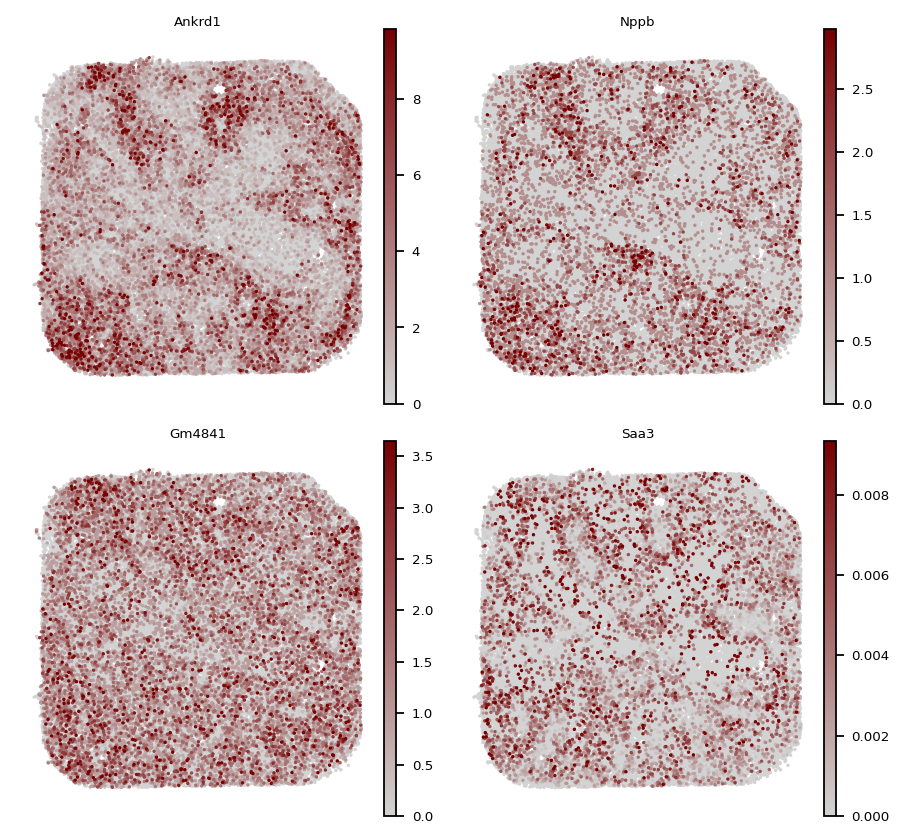

In [45]:
sc.settings.set_figure_params(dpi_save= 300, fontsize=6, figsize=(3.0,3.0), facecolor='white', frameon=True, vector_friendly = True, transparent=True, format="pdf")
sc.pl.spatial(adata_vis, color=["Ankrd1", 'Nppb', "Gm4841", "Saa3"], ncols=2, frameon=False, 
              spot_size=50, hspace=0.1, wspace=0.1,
              # limit color scale at 99.2% quantile of cell abundance
              vmin=0, vmax='p99.2', cmap=sns.blend_palette(["lightgray", sns.xkcd_rgb["blood"]], as_cmap=True), save="geneexp_slideseq_3.pdf")